In [25]:
import pandas as pd
import numpy as np
from sklearn import datasets

data = pd.DataFrame(data=datasets.load_iris().data, columns=['seplen','sepwid','petlen','petwid'])
data['target']=datasets.load_iris().target


In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)

In [ ]:
data.isnull().sum()

In [ ]:
data.groupby('target').count()

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-1]],data['target'],test_size=0.2,random_state=23,stratify=data['target'])

from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)

In [12]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30

1.0


In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.01,0.1,1,10]}
clf = GridSearchCV(SVC(),parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)
y_true,y_pred=y_test,clf.predict(x_test)
print(classification_report(y_true,y_pred))
accuracy_score(y_true,y_pred)

{'C': 1}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30



1.0

[-0.22178881  0.2363588   0.52710905]


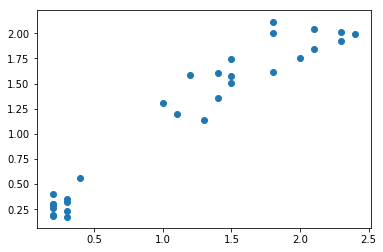

In [35]:
x_train,x_test,y_train,y_test = train_test_split(data[data.columns[0:3]],data[data.columns[3]],test_size=0.2,random_state=23)

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x_train,y_train)
print(clf.coef_)
y_true,y_pred = y_test,clf.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_true,y_pred)

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical


x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-1]],data['target'],test_size=0.2,random_state=23,stratify=data['target'])
y_train = to_categorical(y_train, num_classes=len(set(data['target'])))
y_test = to_categorical(y_test, num_classes=len(set(data['target'])))
scal = StandardScaler()
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)
          
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(set(data['target'])), activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
model.fit(x_train, y_train, epochs=200)
score = model.evaluate(x_test, y_test)

Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 0.9744 - acc: 0.5667
Epoch 2/200
120/120 [==============================] - 0s 42us/step - loss: 0.8715 - acc: 0.7250
Epoch 3/200
120/120 [==============================] - 0s 50us/step - loss: 0.7308 - acc: 0.7833
Epoch 4/200
120/120 [==============================] - 0s 58us/step - loss: 0.6709 - acc: 0.7917
Epoch 5/200
120/120 [==============================] - 0s 50us/step - loss: 0.6371 - acc: 0.7833
Epoch 6/200
120/120 [==============================] - 0s 58us/step - loss: 0.5734 - acc: 0.8083
Epoch 7/200
120/120 [==============================] - 0s 42us/step - loss: 0.5014 - acc: 0.8000
Epoch 8/200
120/120 [==============================] - 0s 42us/step - loss: 0.4912 - acc: 0.8250
Epoch 9/200
120/120 [==============================] - 0s 50us/step - loss: 0.4598 - acc: 0.8167
Epoch 10/200
120/120 [==============================] - 0s 42us/step - loss: 0.4206 - acc: 0.8167
Epoch 11/200
120/120 [========

120/120 [==============================] - 0s 42us/step - loss: 0.1121 - acc: 0.9500
Epoch 85/200
120/120 [==============================] - 0s 50us/step - loss: 0.1297 - acc: 0.9500
Epoch 86/200
120/120 [==============================] - 0s 42us/step - loss: 0.0920 - acc: 0.9667
Epoch 87/200
120/120 [==============================] - 0s 42us/step - loss: 0.0798 - acc: 0.9917
Epoch 88/200
120/120 [==============================] - 0s 42us/step - loss: 0.0979 - acc: 0.9667
Epoch 89/200
120/120 [==============================] - 0s 50us/step - loss: 0.0848 - acc: 0.9583
Epoch 90/200
120/120 [==============================] - 0s 50us/step - loss: 0.0935 - acc: 0.9667
Epoch 91/200
120/120 [==============================] - 0s 50us/step - loss: 0.0878 - acc: 0.9500
Epoch 92/200
120/120 [==============================] - 0s 42us/step - loss: 0.0908 - acc: 0.9750
Epoch 93/200
120/120 [==============================] - 0s 42us/step - loss: 0.1213 - acc: 0.9500
Epoch 94/200
120/120 [===========

120/120 [==============================] - 0s 42us/step - loss: 0.0461 - acc: 0.9917
Epoch 167/200
120/120 [==============================] - 0s 42us/step - loss: 0.0520 - acc: 0.9667
Epoch 168/200
120/120 [==============================] - 0s 50us/step - loss: 0.1055 - acc: 0.9583
Epoch 169/200
120/120 [==============================] - 0s 42us/step - loss: 0.0488 - acc: 0.9750
Epoch 170/200
120/120 [==============================] - 0s 50us/step - loss: 0.0734 - acc: 0.9583
Epoch 171/200
120/120 [==============================] - 0s 42us/step - loss: 0.0785 - acc: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 50us/step - loss: 0.0878 - acc: 0.9583
Epoch 173/200
120/120 [==============================] - 0s 42us/step - loss: 0.0384 - acc: 0.9917
Epoch 174/200
120/120 [==============================] - 0s 42us/step - loss: 0.0402 - acc: 0.9833
Epoch 175/200
120/120 [==============================] - 0s 50us/step - loss: 0.0629 - acc: 0.9750
Epoch 176/200
120/120 [=

In [92]:
score

[0.03331363946199417, 1.0]